<a href="https://colab.research.google.com/github/Sandeep2111/Global_Terrorism_Analysis/blob/main/Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Reading the dataset using "ISO-8859-1" as encoding 
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Capstone/EDA/Copy of Global Terrorism Data.csv',encoding='ISO-8859-1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
dataset.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


##### In This Notebook i will be cleaning and decompressing the dataset i.e performing the initial pre processing of the data for The Analysis purpose

In [ ]:
#Find the shape of the dataset
dataset.shape

(181691, 135)

Here we can see that the dataset has 135 features and 181691 Examples we will use only those columns which are required for Data analysis and clean the dataset before that let us check the null values in the dataset.

In [ ]:
#To find the column names
dataset.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [ ]:
#check for null values in the dataset
col_ser = pd.Series(dataset.isnull().sum())

In [ ]:
col_ser[:50]

eventid                  0
iyear                    0
imonth                   0
iday                     0
approxdate          172452
extended                 0
resolution          179471
country                  0
country_txt              0
region                   0
region_txt               0
provstate              421
city                   434
latitude              4556
longitude             4557
specificity              6
vicinity                 0
location            126196
summary              66129
crit1                    0
crit2                    0
crit3                    0
doubtterr                1
alternative         152680
alternative_txt     152680
multiple                 1
success                  0
suicide                  0
attacktype1              0
attacktype1_txt          0
attacktype2         175377
attacktype2_txt     175377
attacktype3         181263
attacktype3_txt     181263
targtype1                0
targtype1_txt            0
targsubtype1         10373
t

Most of the features have large number of null values which has to be taken care of hence  will delete the features which has more than 10% of the Null values of the examples.

In [ ]:
null_threshold = dataset.shape[0]*0.1
dataset_new = dataset.drop(dataset.columns[dataset.apply(lambda col:col.isnull().sum()>null_threshold)],axis=1)

In [ ]:
dataset_new.shape

(181691, 45)

In [ ]:
dataset_new.head()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,target1,natlty1,natlty1_txt,gname,guncertain1,individual,weaptype1,weaptype1_txt,nkill,nwound,property,ishostkid,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,1,1,1,0.0,0.0,1,0,1,Assassination,14,Private Citizens & Property,68.0,Named Civilian,Julio Guzman,58.0,Dominican Republic,MANO-D,0.0,0,13,Unknown,1.0,0.0,0,0.0,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,1,1,1,0.0,0.0,1,0,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...","Nadine Chaval, daughter",21.0,Belgium,23rd of September Communist League,0.0,0,13,Unknown,0.0,0.0,0,1.0,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,1,1,1,0.0,0.0,1,0,1,Assassination,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Employee,217.0,United States,Unknown,0.0,0,13,Unknown,1.0,0.0,0,0.0,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,7,Government (Diplomatic),46.0,Embassy/Consulate,U.S. Embassy,217.0,United States,Unknown,0.0,0,6,Explosives,NaN,NaN,1,0.0,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,1,1,1,-9.0,0.0,1,0,7,Facility/Infrastructure Attack,7,Government (Diplomatic),46.0,Embassy/Consulate,U.S. Consulate,217.0,United States,Unknown,0.0,0,8,Incendiary,NaN,NaN,1,0.0,PGIS,-9,-9,1,1


### Feature Selection for Data Analysis and Renaming the Columns

Selecting the columns which are required for Data Analysis and Renaming the columns to the most desired type.

In [ ]:
dataset_new.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country',
       'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude',
       'longitude', 'specificity', 'vicinity', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1',
       'attacktype1_txt', 'targtype1', 'targtype1_txt', 'targsubtype1',
       'targsubtype1_txt', 'target1', 'natlty1', 'natlty1_txt', 'gname',
       'guncertain1', 'individual', 'weaptype1', 'weaptype1_txt', 'nkill',
       'nwound', 'property', 'ishostkid', 'dbsource', 'INT_LOG', 'INT_IDEO',
       'INT_MISC', 'INT_ANY'],
      dtype='object')

In [ ]:
columns_required = ['eventid','iyear','country_txt','region_txt','provstate','city','latitude','longitude','specificity','success','suicide',
                    'attacktype1_txt','targtype1_txt','targsubtype1_txt','gname','weaptype1_txt','nkill','nwound']

#Renaming the columns
col_names = ['ID','Year','Country','Region','State','City','Latitude','Longitude','Specificity','Is_Success','Suicide',
             'Attacktype','Targettype','Targetsubtype','Terror_Group','Weapontype','Kills','Wounded']

terrorist_data = dataset_new[columns_required]
terrorist_data.columns = col_names

terrorist_data.head()

,ID,Year,Country,Region,State,City,Latitude,Longitude,Specificity,Is_Success,Suicide,Attacktype,Targettype,Targetsubtype,Terror_Group,Weapontype,Kills,Wounded
0,197000000001,1970,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,1,0,Assassination,Private Citizens & Property,Named Civilian,MANO-D,Unknown,1.0,0.0
1,197000000002,1970,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,1.0,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League,Unknown,0.0,0.0
2,197001000001,1970,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,1,0,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Unknown,Unknown,1.0,0.0
3,197001000002,1970,Greece,Western Europe,Attica,Athens,37.997490,23.762728,1.0,1,0,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,Unknown,Explosives,NaN,NaN
4,197001000003,1970,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,1,0,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,Unknown,Incendiary,NaN,NaN


In [ ]:
#check for null values in the dataset
col_ser = pd.Series(terrorist_data.isnull().sum())
col_ser

ID                   0
Year                 0
Country              0
Region               0
State              421
City               434
Latitude          4556
Longitude         4557
Specificity          6
Is_Success           0
Suicide              0
Attacktype           0
Targettype           0
Targetsubtype    10373
Terror_Group         0
Weapontype           0
Kills            10313
Wounded          16311
dtype: int64

In [ ]:
# Finding the data type of columns which has null values
null_col = terrorist_data.columns[terrorist_data.isnull().sum()>0]

for col in null_col:
  print(f'{col} -->is of type: {terrorist_data[col].dtype}')

State -->is of type: object
City -->is of type: object
Latitude -->is of type: float64
Longitude -->is of type: float64
Specificity -->is of type: float64
Targetsubtype -->is of type: object
Kills -->is of type: float64
Wounded -->is of type: float64


In [ ]:
terrorist_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             181691 non-null  int64  
 1   Year           181691 non-null  int64  
 2   Country        181691 non-null  object 
 3   Region         181691 non-null  object 
 4   State          181270 non-null  object 
 5   City           181257 non-null  object 
 6   Latitude       177135 non-null  float64
 7   Longitude      177134 non-null  float64
 8   Specificity    181685 non-null  float64
 9   Is_Success     181691 non-null  int64  
 10  Suicide        181691 non-null  int64  
 11  Attacktype     181691 non-null  object 
 12  Targettype     181691 non-null  object 
 13  Targetsubtype  171318 non-null  object 
 14  Terror_Group   181691 non-null  object 
 15  Weapontype     181691 non-null  object 
 16  Kills          171378 non-null  float64
 17  Wounded        165380 non-nul

In [ ]:
terrorist_data.describe()

,ID,Year,Latitude,Longitude,Specificity,Is_Success,Suicide,Kills,Wounded
count,1.816910e+05,181691.000000,177135.000000,1.771340e+05,181685.000000,181691.000000,181691.000000,171378.000000,165380.000000
mean,2.002705e+11,2002.638997,23.498343,-4.586957e+02,1.451452,0.889598,0.036507,2.403272,3.167668
std,1.325957e+09,13.259430,18.569242,2.047790e+05,0.995430,0.313391,0.187549,11.545741,35.949392
min,1.970000e+11,1970.000000,-53.154613,-8.618590e+07,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.991021e+11,1991.000000,11.510046,4.545640e+00,1.000000,1.000000,0.000000,0.000000,0.000000
50%,2.009022e+11,2009.000000,31.467463,4.324651e+01,1.000000,1.000000,0.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,34.685087,6.871033e+01,1.000000,1.000000,0.000000,2.000000,2.000000
max,2.017123e+11,2017.000000,74.633553,1.793667e+02,5.000000,1.000000,1.000000,1570.000000,8191.000000


1. The data is from Year 1970 to 2017.
2. Is_Success shows that whether the attack was success or not which Indicates 1 For success and 0 for Not Success.
3. Latitude and Longitude indicates the location of the attack
4. Specificity indicates the scale of the specificity 1 being the least specific and 5 being More specifi of the attack.
5. Suicide indicates whether it was Sucide mission or not 1 being Suicide and 0 Non Suicide attack

In [ ]:
str_df = terrorist_data.select_dtypes(exclude=[float, int])
str_cols = list(set(str_df.columns.tolist()))
str_df = str_df[str_cols]
str_desc_df = str_df.describe().iloc[1:3,:]
nans = np.round(str_df[str_df == 'Unknown'].count()/len(str_df)*100, decimals=2).astype(str)+'%'
nans.name = 'nans'
str_desc_df.append(nans)

,Weapontype,Targettype,City,Terror_Group,Country,Targetsubtype,Attacktype,Region,State
unique,12,22,36674,3537,205,112,9,12,2855
top,Explosives,Private Citizens & Property,Unknown,Unknown,Iraq,Unnamed Civilian/Unspecified,Bombing/Explosion,Middle East & North Africa,Baghdad
nans,8.34%,3.25%,5.38%,45.56%,0.0%,0.0%,4.0%,0.0%,2.36%


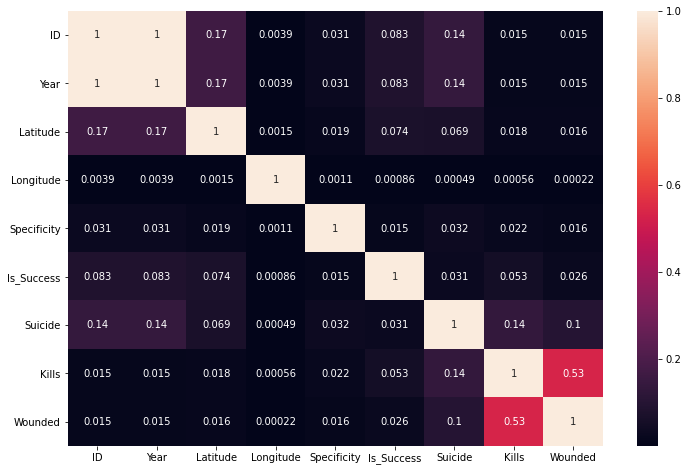

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(terrorist_data.corr().abs(),annot=True,)

Here we can see that Wounded and Kills are closely related features

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


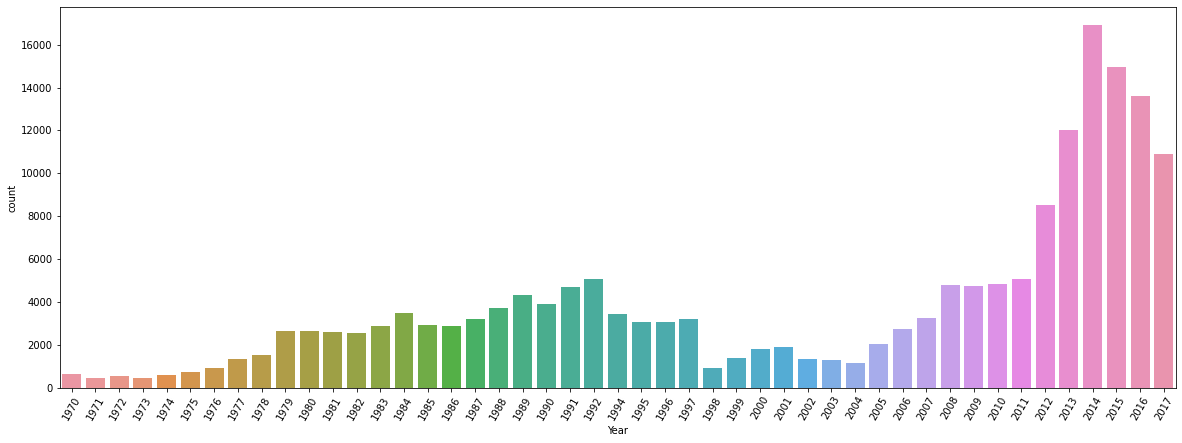

In [ ]:
plt.figure(figsize=(20,7))
plt.xticks(rotation=60)
sns.countplot(terrorist_data['Year'])

Here we can see that the data is left skewed and also by this graph we can get into conclusion that the terrorist activity was most reported after the year 2000. There is a drastic increase in terrorist activity after 2004

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


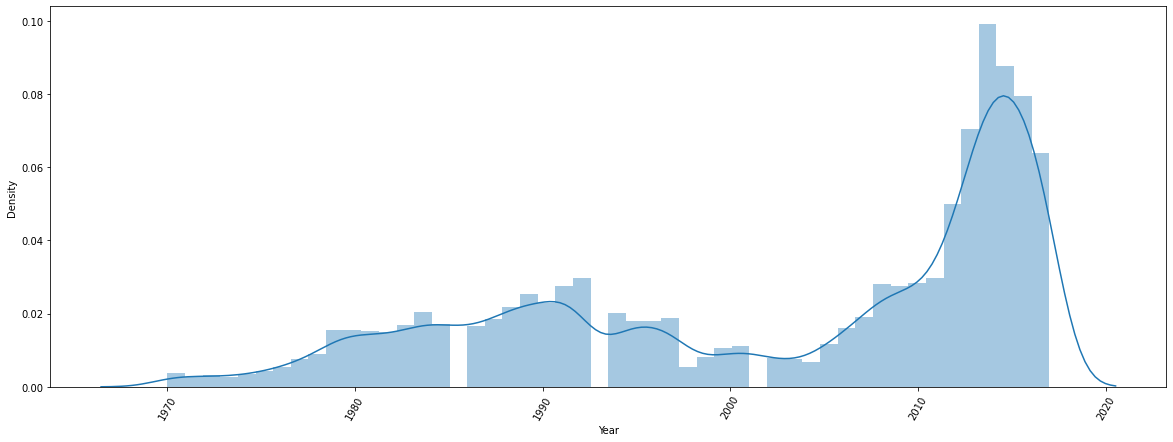

In [ ]:
plt.figure(figsize=(20,7))
plt.xticks(rotation=60)
sns.distplot(terrorist_data['Year'])

## Terrorist activity count based on the region Type

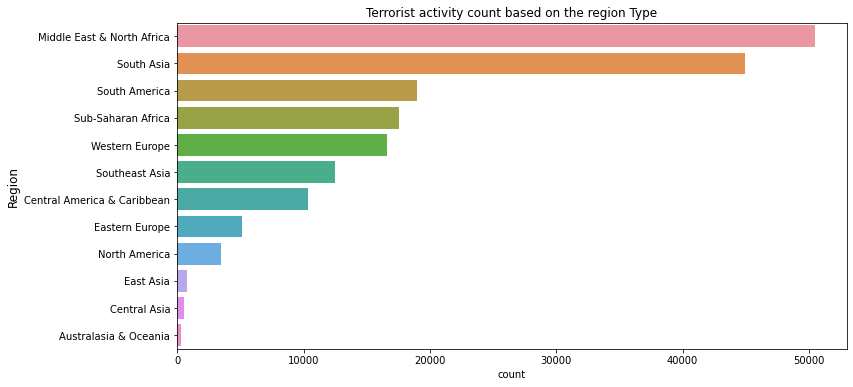

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Terrorist activity count based on the region Type')
plt.ylabel('Region', fontsize=12)
year_count = sns.countplot(y='Region',data=terrorist_data,order=terrorist_data['Region'].value_counts().index)

By The graph above we can see that Middle East And North Africa,South Asia have Terrorist incidents which has more than 40000 cases.

##Visualization to check the weapon type

In [ ]:
terrorist_data['Weapontype'].unique()

array(['Unknown', 'Explosives', 'Incendiary', 'Firearms', 'Chemical',
       'Melee', 'Sabotage Equipment',
       'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)',
       'Fake Weapons', 'Radiological', 'Other', 'Biological'],
      dtype=object)

In [ ]:
terrorist_data['Weapontype'].replace({'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)':'Vehicle'},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


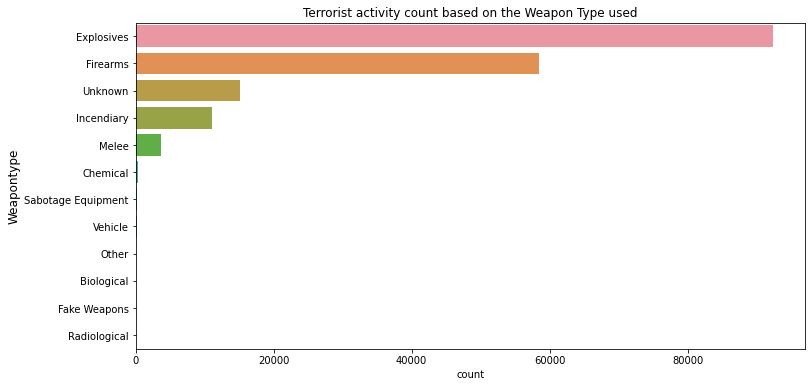

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Terrorist activity count based on the Weapon Type used')
plt.ylabel('Wepon_Type', fontsize=12)
year_count = sns.countplot(y='Weapontype',data=terrorist_data,order=terrorist_data['Weapontype'].value_counts().index)

They type of Weapon Type used in in the attack is mostly Exploives and Firearms 

#Attack Type

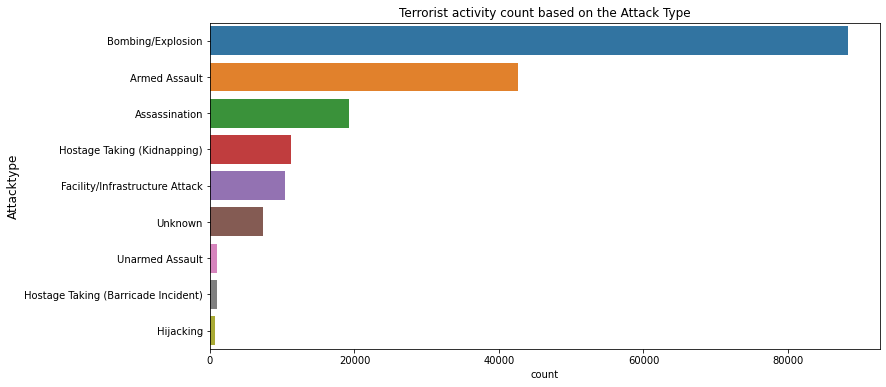

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Terrorist activity count based on the Attack Type')
plt.ylabel('Attacktype', fontsize=12)
year_count = sns.countplot(y='Attacktype',data=terrorist_data,order=terrorist_data['Attacktype'].value_counts().index)

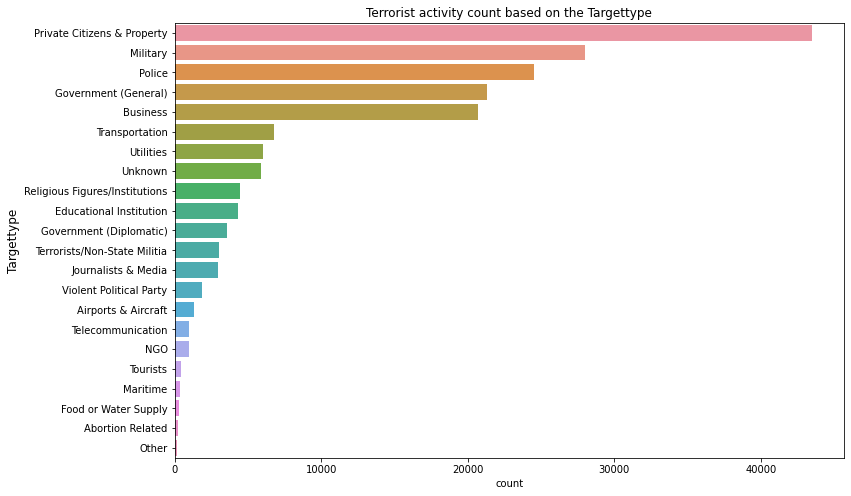

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Terrorist activity count based on the Targettype')
plt.ylabel('Targettype', fontsize=12)
year_count = sns.countplot(y='Targettype',data=terrorist_data,order=terrorist_data['Targettype'].value_counts().index)

## Attackes based on Country

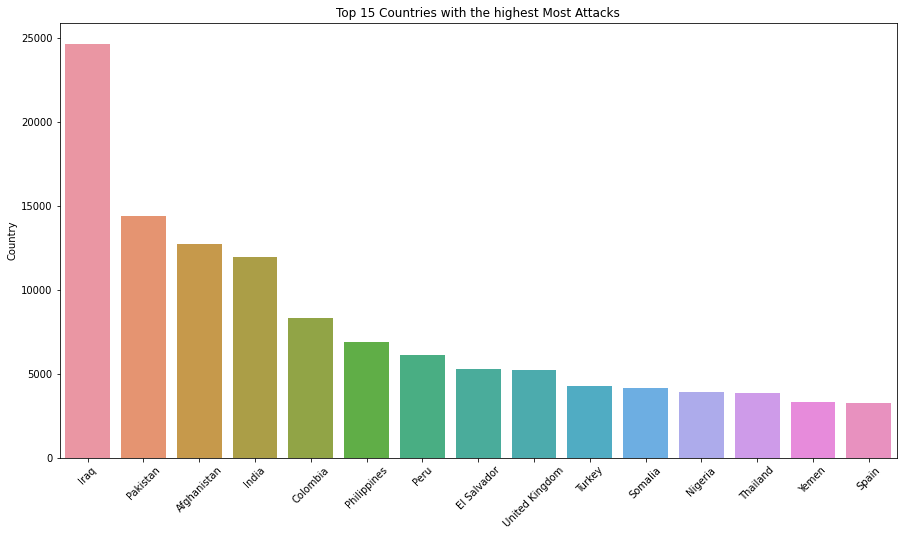

In [ ]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
plt.title('Top 15 Countries with the highest Most Attacks')
sns.barplot(x=terrorist_data['Country'].value_counts()[:15].index,y = terrorist_data['Country'].value_counts()[:15])

In [ ]:
terrorist_data.sample()

,ID,Year,Country,Region,State,City,Latitude,Longitude,Specificity,Is_Success,Suicide,Attacktype,Targettype,Targetsubtype,Terror_Group,Weapontype,Kills,Wounded
9628,197911090002,1979,United States,North America,Wisconsin,Milwaukee,43.064388,-87.966202,1.0,0,0,Bombing/Explosion,Educational Institution,School/University/Educational Building,East Side Action Committee,Explosives,0.0,0.0


##Check for Specificity

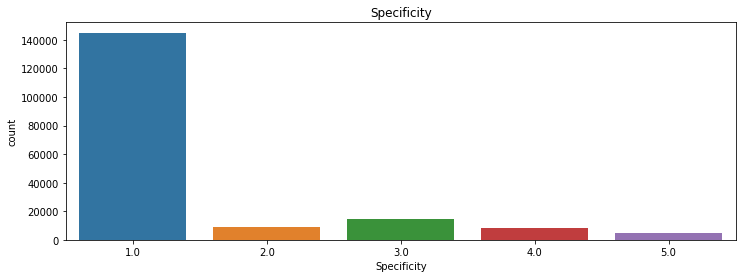

In [ ]:
plt.figure(figsize=(12,4))
plt.title('Specificity')
sns.countplot(x='Specificity',data=terrorist_data)

# Check for Failure and Success 

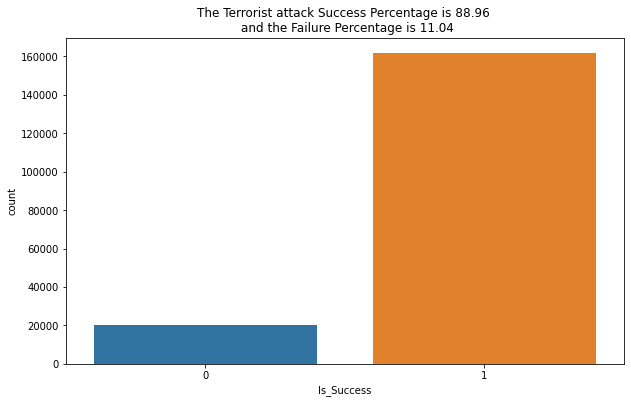

In [ ]:
success = sum(terrorist_data['Is_Success']==1) / len(terrorist_data) *100
failure = sum(terrorist_data['Is_Success']==0) / len(terrorist_data) *100 
plt.figure(figsize=(10,6))
plt.title(f'The Terrorist attack Success Percentage is {round(success,2)} \n and the Failure Percentage is {round(failure,2)}',fontsize=12)
sns.countplot(x=terrorist_data['Is_Success'])

###Attacks Reported Based on the Year in the Region

In [ ]:
attacks_year = pd.crosstab(terrorist_data['Year'],terrorist_data['Region'])
attacks_year.head(5)

Region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,,,
1970,1,7,0,2,12,28,472,65,1,10,3,50
1971,1,5,0,1,5,55,247,24,0,6,2,125
1972,8,3,0,0,1,53,73,33,1,16,4,376
1973,1,6,0,2,1,19,64,83,1,2,4,290
1974,1,11,0,4,2,42,111,81,2,3,7,317


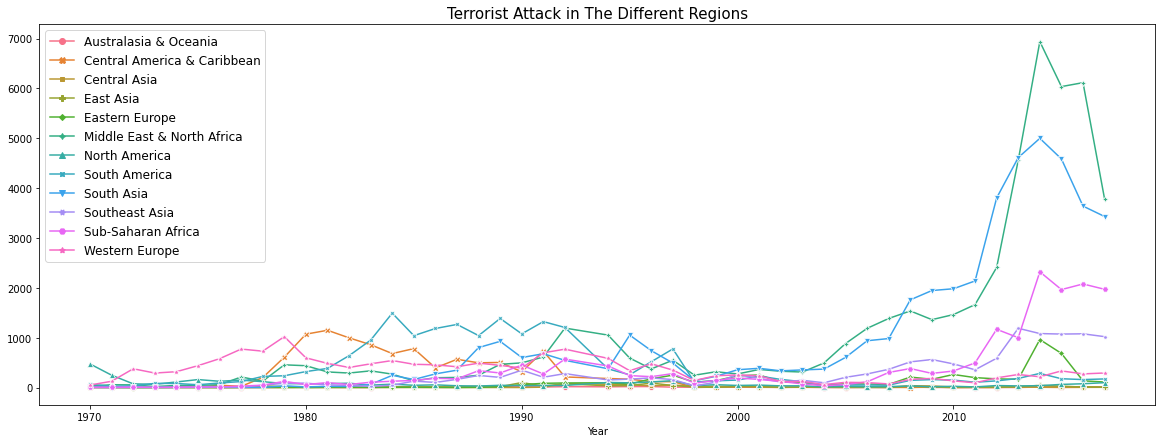

In [ ]:
plt.figure(figsize=(20,7))
plt.title('Terrorist Attack in The Different Regions',fontsize=15)
sns.lineplot(data=attacks_year,markers=True,dashes=False)
plt.legend(fontsize=12)

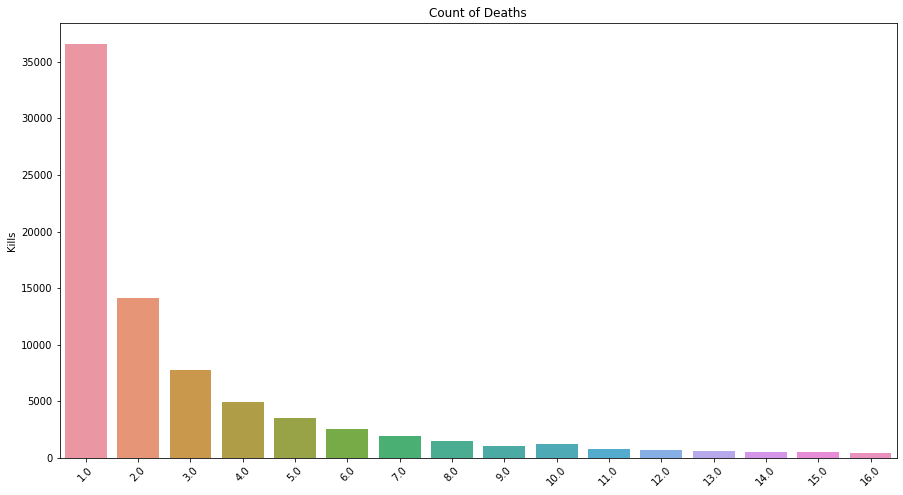

In [ ]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
plt.title('Count of Deaths')
sns.barplot(x=terrorist_data['Kills'].value_counts()[1:16].index,y = terrorist_data['Kills'].value_counts()[1:16])

In [ ]:
# Highest number of kills by terrorist group
terrorist_data['Kills'].max()

1570.0

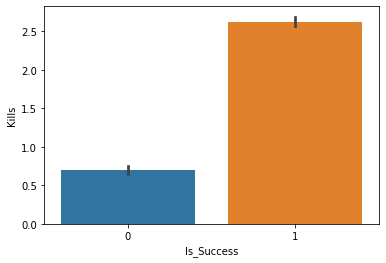

In [ ]:
sns.barplot(y=terrorist_data['Kills'],x=terrorist_data['Is_Success'])

## Using Groupby To group by Region

In [ ]:
groupby_region = terrorist_data.groupby(by='Region')

In [ ]:
terrorist_data['Region'].unique()

array(['Central America & Caribbean', 'North America', 'Southeast Asia',
       'Western Europe', 'East Asia', 'South America', 'Eastern Europe',
       'Sub-Saharan Africa', 'Middle East & North Africa',
       'Australasia & Oceania', 'South Asia', 'Central Asia'],
      dtype=object)

###checking based on region data

In [ ]:
groupby_region_south_asia = groupby_region.get_group('South Asia')
groupby_region_south_asia.head()

,ID,Year,Country,Region,State,City,Latitude,Longitude,Specificity,Is_Success,Suicide,Attacktype,Targettype,Targetsubtype,Terror_Group,Weapontype,Kills,Wounded
585,197011010001,1970,Pakistan,South Asia,Sindh,Karachi,24.891115,67.143311,1.0,1,0,Assassination,Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",Unknown,Vehicle,4.0,20.0
1186,197202220004,1972,India,South Asia,Delhi,New Delhi,28.585836,77.153336,1.0,1,0,Hijacking,Airports & Aircraft,Aircraft (not at an airport),Palestinians,Explosives,0.0,0.0
1863,197305010002,1973,Afghanistan,South Asia,Kabul,Kabul,34.516895,69.147011,1.0,0,0,Unknown,Airports & Aircraft,Airline Officer/Personnel,Black December,Unknown,0.0,1.0
2217,197402020001,1974,Pakistan,South Asia,Sindh,Karachi,24.891115,67.143311,1.0,1,0,Bombing/Explosion,Maritime,Commercial Maritime,Muslim Guerrillas,Firearms,0.0,0.0
2705,197412090001,1974,Pakistan,South Asia,North-West Frontier Province,Peshawar,34.006004,71.537430,1.0,1,0,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,Unknown,Explosives,0.0,2.0


In [ ]:
groupby_region_south_asia['Country'].value_counts()

Pakistan       14368
Afghanistan    12731
India          11960
Sri Lanka       3022
Bangladesh      1648
Nepal           1215
Maldives          22
Bhutan             6
Mauritius          2
Name: Country, dtype: int64

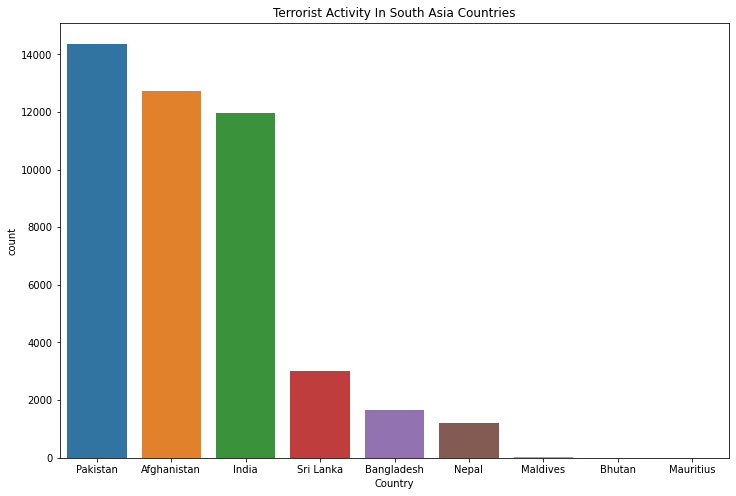

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Terrorist Activity In South Asia Countries')
sns.countplot(x='Country',data=groupby_region_south_asia,order=groupby_region_south_asia['Country'].value_counts().index)

In [ ]:
groupby_region_south_asia['Terror_Group'].unique()

array(['Unknown', 'Palestinians', 'Black December', 'Muslim Guerrillas',
       'Ananda Marga', 'National Awami Party',
       'Liberation Tigers of Tamil Eelam (LTTE)',
       'Abu Nidal Organization (ANO)', 'Japanese Red Army (JRA)',
       'Naga People', 'Shia Muslim extremists', 'Palestinian Students',
       'Meitei extremists', 'Mizo National Front', 'Supporter of Bhutto',
       'Muslims', 'Naxalites', "People's Liberation Army (India)", 'Mob',
       'Maoists', 'Kabul Government Agents', 'Anti-Immigrant extremists',
       'Al-Zulfikar', 'Insurgents', 'Awami League', 'Extremists',
       'Aghwar "Fire War" Group', 'Dissident', 'Sikh Extremists',
       'Secessionists', 'Tamils', 'Akali Dal Party', 'Iranians',
       'Iraqi Mujahideen', 'All India Sikh Students Federation (AISSF)',
       "Fedayeen Khalq (People's Commandos)", 'New Armenian Resistance',
       'Tripura National Volunteers (TNV)',
       'Jammu and Kashmir Liberation Front', 'Death Squad', 'Terrorists',
       'T

###Top 20 Terrorist Group in South Asia

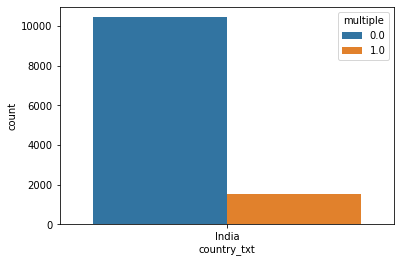

In [ ]:
sns.countplot(x='country_txt',hue='multiple',data = city_india)

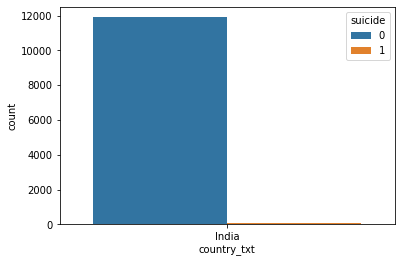

In [ ]:
sns.countplot(x='country_txt',hue='suicide',data = city_india)

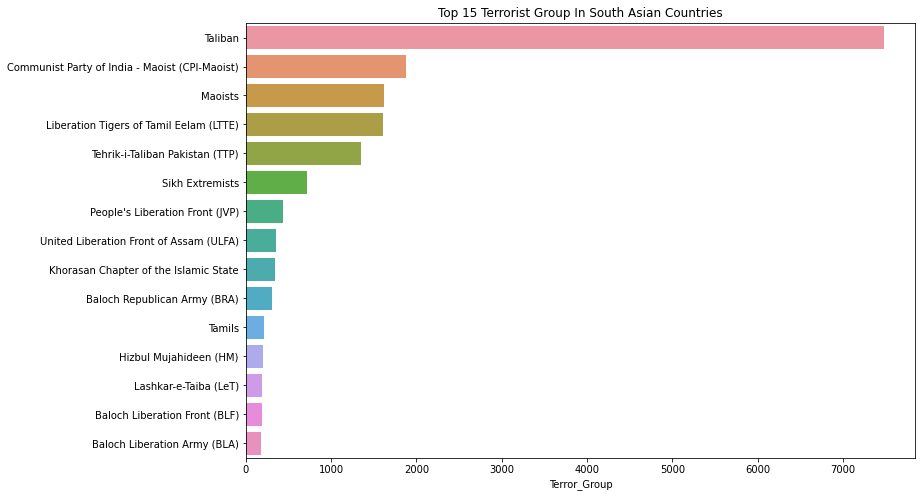

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Top 15 Terrorist Group In South Asian Countries')
sns.barplot(y=groupby_region_south_asia['Terror_Group'].value_counts()[1:16].index,x=groupby_region_south_asia['Terror_Group'].value_counts()[1:16])